# Plotting a Lorenz System
Inspired by reading James Cleick's *Chaos: Making a New Science*

In [15]:
class LorenzSystem:
    def __init__(self,sigma, rho, beta, start_x, start_y, start_z):
        self.sigma=sigma
        self.rho=rho
        self.beta = beta
        self.x=start_x
        self.y=start_y
        self.z=start_z
    def update(self, dt):
        update_x = self.sigma*(self.y-self.x)
        update_y = self.x*(self.rho-self.z)-self.y
        update_z = self.x*self.y-self.beta*self.z
        self.x+=update_x*dt
        self.y+=update_y*dt
        self.z+=update_z*dt
    def get_values(self):
        return [self.x,self.y,self.z]

In [33]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

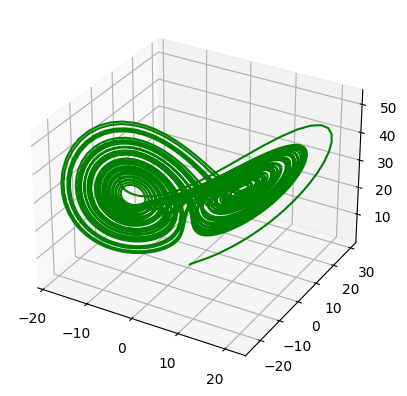

In [34]:
steps = 5000
values = np.zeros([steps,3],dtype=float)
dt = 0.01
sys = LorenzSystem(10,28,(8/3),0.4,0.4,0.4) #Rho, beta and sigma as originally used by Edward Lorenz
for x in range(steps):
    val = sys.get_values()
    values[x]=val
    sys.update(dt)
x_1 = values[:,0].copy()
y_1 = values[:,1].copy()
z_1 = values[:,2].copy()
ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_1, y_1, z_1, 'green')

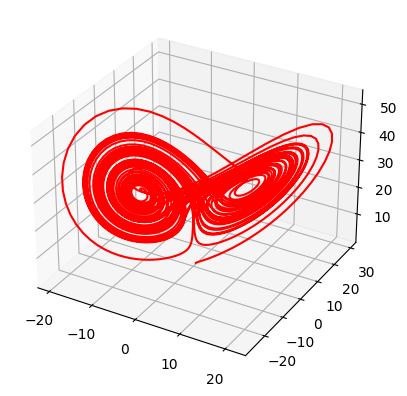

In [35]:
sys = LorenzSystem(10,28,(8/3),0.401,0.401,0.401)
for x in range(steps):
    val = sys.get_values()
    values[x]=val
    sys.update(dt)
x_2 = values[:,0].copy()
y_2 = values[:,1].copy()
z_2 = values[:,2].copy()
ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_2, y_2, z_2, 'red')

In [36]:
print(x_1[0]," ",x_2[0])

0.4   0.401


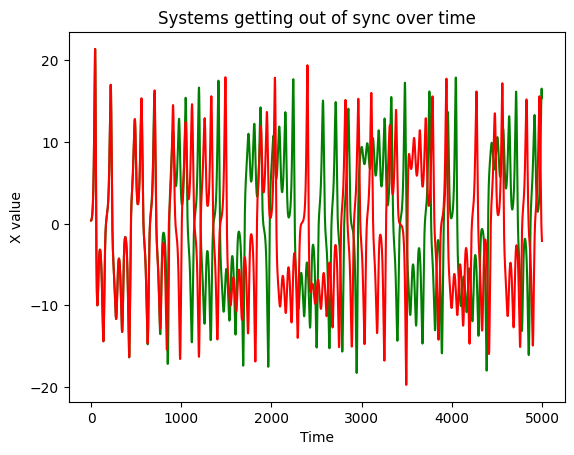

In [38]:

plt.plot(x_1,color='g')
plt.plot(x_2,color="r")
plt.title("Systems getting out of sync over time")
plt.ylabel("X value")
plt.xlabel("Time")
plt.show()

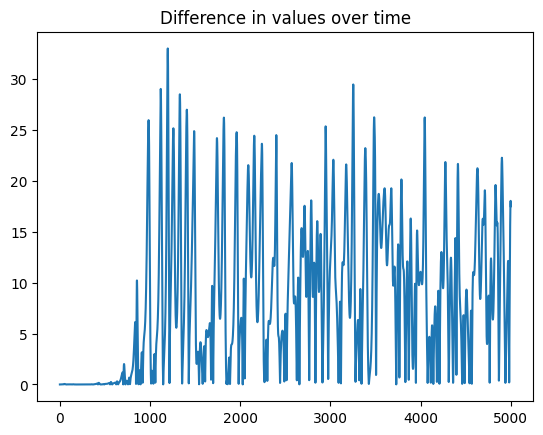

In [40]:
value_change = abs(x_1-x_2)
plt.plot(value_change)
plt.title("Difference in values over time")
plt.show()

## Values of Rho below 1 converge to origin:

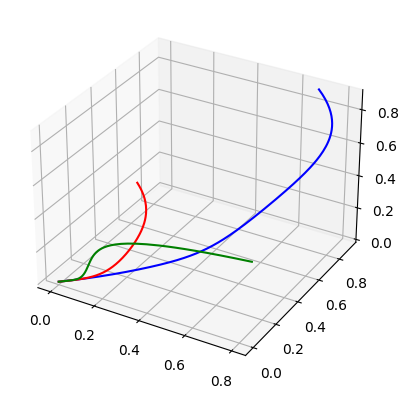

In [49]:
sys = LorenzSystem(10,0.8,(8/3),0.7,0.9,0.9)
steps = 30000
values = np.zeros([steps,3],dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x]=val
    sys.update(dt)
x_3 = values[:,0].copy()
y_3 = values[:,1].copy()
z_3 = values[:,2].copy()

sys = LorenzSystem(10,0.4,(8/3),0.2,0.3,0.5)
for x in range(steps):
    val = sys.get_values()
    values[x]=val
    sys.update(dt)
x_4 = values[:,0].copy()
y_4 = values[:,1].copy()
z_4 = values[:,2].copy()

sys = LorenzSystem(10,0.6,(8/3),0.8,0.1,0.4)
for x in range(steps):
    val = sys.get_values()
    values[x]=val
    sys.update(dt)
x_5 = values[:,0].copy()
y_5 = values[:,1].copy()
z_5 = values[:,2].copy()



ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_3, y_3, z_3, 'blue')
ax.plot3D(x_4, y_4, z_4, 'red')
ax.plot3D(x_5, y_5, z_5, 'green')